### Lecture 2 - Unsupervised Learning

In [1]:
# import common libraries
import pandas as pd
import numpy as np
from numpy.random import uniform
import matplotlib.pyplot as plt
import seaborn as sns

import random

import warnings
warnings.filterwarnings("ignore")

# import library to create sample of clustered data
from sklearn.datasets import make_blobs

# import machine learning models
from sklearn.preprocessing import StandardScaler

First let's explore the diffence between Supervised and Unsupervised learning

### Supervised Learning Scenario

Using the Iris Dataset, since we know the classes, this would be a supervised classification.

In [2]:
# import iris data
from sklearn.datasets import load_iris

In [3]:
# load iris data
data = load_iris()

# set X and y values from iris data
X = data.data
y = data.target

In [4]:
# create pandas dataframe for easier manipulation
df = pd.DataFrame(X, columns=['Sepal Length','Sepal Width','Petal Length','Petal Width'])

# add target column to dataframe
df['Target'] = y

# add target names for descriptive legends in plots
df.loc[df['Target'] == 0, 'TargetName'] = 'Setosa'
df.loc[df['Target'] == 1, 'TargetName'] = 'Versicolor'
df.loc[df['Target'] == 2, 'TargetName'] = 'Virginica'

# view top of dataframe to check it
df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Target,TargetName
0,5.1,3.5,1.4,0.2,0,Setosa
1,4.9,3.0,1.4,0.2,0,Setosa
2,4.7,3.2,1.3,0.2,0,Setosa
3,4.6,3.1,1.5,0.2,0,Setosa
4,5.0,3.6,1.4,0.2,0,Setosa


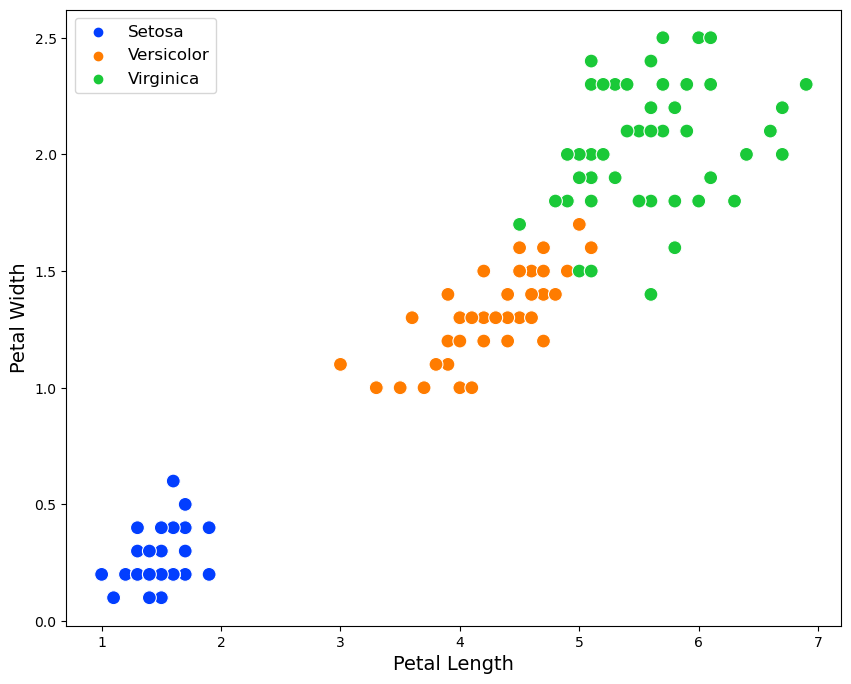

In [5]:
# plot data to show classes
plt.figure(figsize=(10, 8))

sns.scatterplot(data=df, x='Petal Length', y='Petal Width', hue='TargetName', palette='bright', s=100)
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.legend(fontsize=12)
plt.show()

### Unsupervised Learning Scenario

Assume we don't know the classes so we have some same data that looks like this

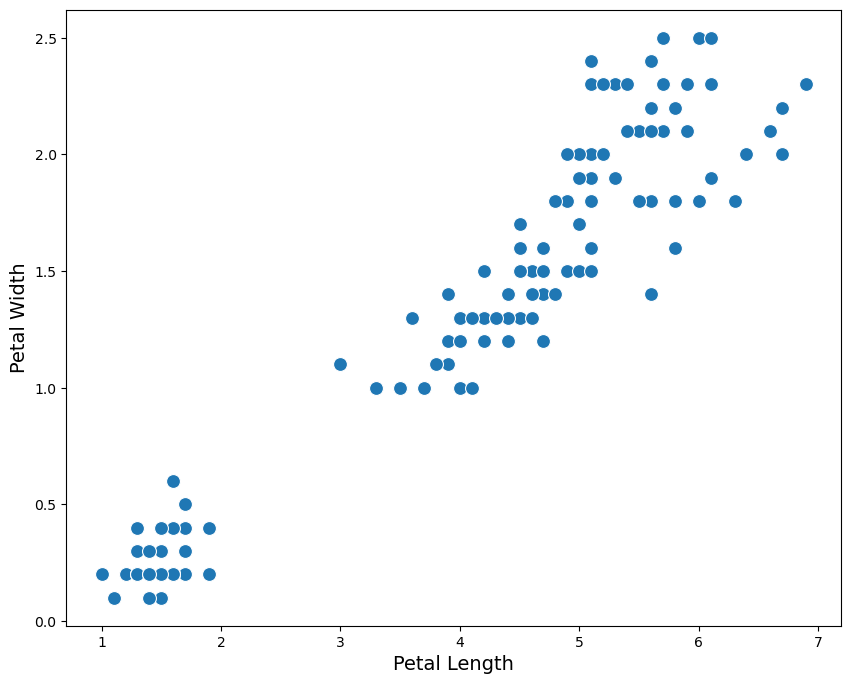

In [6]:
plt.figure(figsize=(10, 8))

sns.scatterplot(data=df, x='Petal Length', y='Petal Width', palette='bright', s=100)
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.show()

In [7]:
# import K-means library 
from sklearn.cluster import KMeans

In [8]:
# load our feature data for Petal Length and Petal Width
features = ['Petal Length','Petal Width']
X = np.array(df[features])

In [9]:
# set k = 3 since we have 3 flower types
k = 3

# run k-means algorithm
kmeans = KMeans(n_clusters=k, random_state=42)

# predict clusters for X
y_pred = kmeans.fit_predict(X)

In [10]:
# show cluster predictions
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
# view cluster centroids
kmeans.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [12]:
# view predicted labels
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [13]:
# build prediction dataframe for plotting
pred_df = pd.DataFrame(X, columns=features)
pred_df['Prediction'] = y_pred
pred_df

,Petal Length,Petal Width,Prediction
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1
...,...,...,...
145,5.2,2.3,0
146,5.0,1.9,0
147,5.2,2.0,0
148,5.4,2.3,0


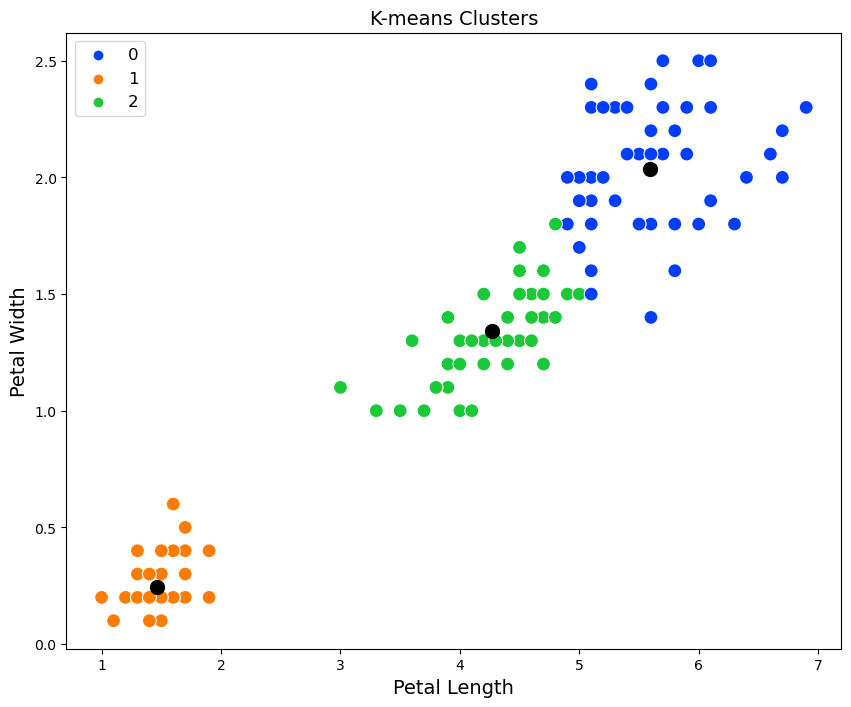

In [14]:
# plot data to show clusters
plt.figure(figsize=(10, 8))

sns.scatterplot(data=pred_df, x='Petal Length', y='Petal Width', hue='Prediction', palette='bright', s=100)
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.title("K-means Clusters", fontsize=14)
plt.legend(fontsize=12)

# plot cluster centers
plt.plot([x for x, _ in kmeans.cluster_centers_], [y for _, y in kmeans.cluster_centers_], 'ko', markersize=10)

plt.show()

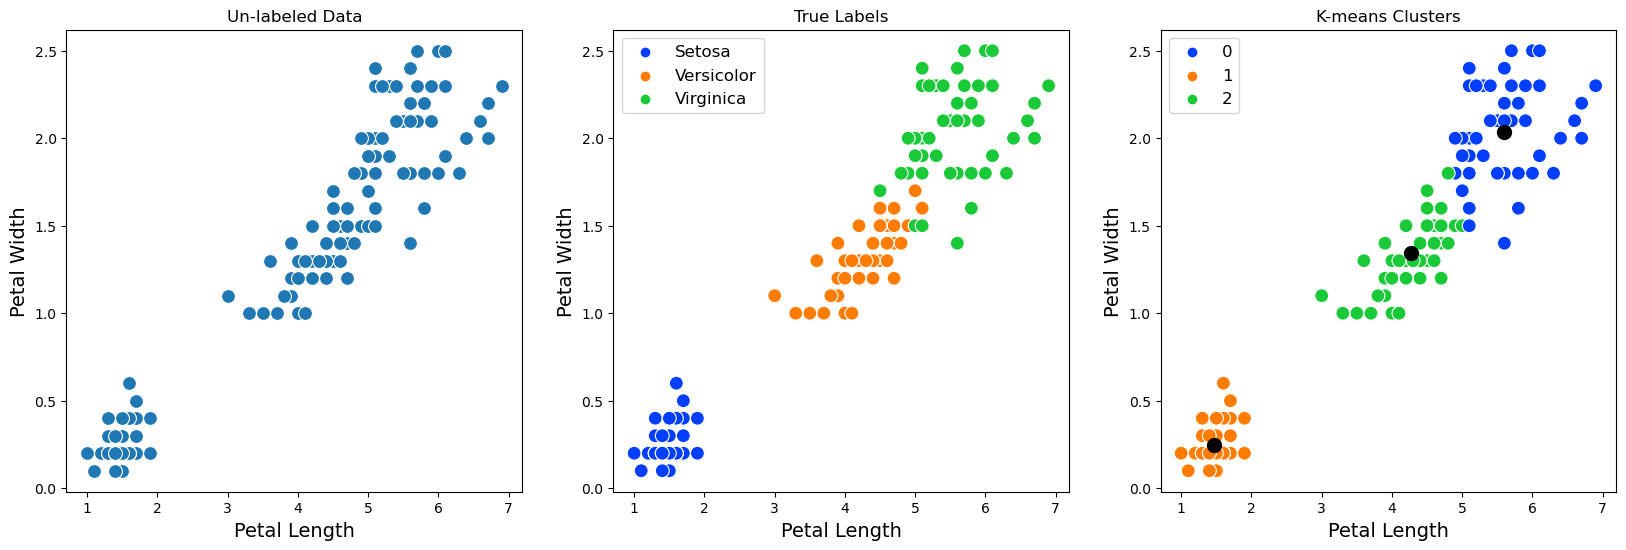

In [15]:
# compare all 3 plots
plt.figure(figsize=(20, 6))

plt.subplot(131)
sns.scatterplot(data=df, x='Petal Length', y='Petal Width', palette='bright', s=100)
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.title("Un-labeled Data")

plt.subplot(132)
sns.scatterplot(data=df, x='Petal Length', y='Petal Width', hue='TargetName', palette='bright', s=100)
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.title("True Labels")
plt.legend(fontsize=12)

plt.subplot(133)
sns.scatterplot(data=pred_df, x='Petal Length', y='Petal Width', hue='Prediction', palette='bright', s=100)
plt.plot([x for x, _ in kmeans.cluster_centers_], [y for _, y in kmeans.cluster_centers_], 'ko', markersize=10)
plt.xlabel("Petal Length", fontsize=14)
plt.ylabel("Petal Width", fontsize=14)
plt.title("K-means Clusters")
plt.legend(fontsize=12)
plt.show()

In [16]:
def plot_boundaries(clusterer, df):
    plt.figure(figsize=(10, 6))
    
    features = ['Petal Length','Petal Width']
    resolution=1000
    mins = (df[features].min() - 0.1).values
    maxs = (df[features].max() + 0.1).values
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]), linewidths=2, colors='k')

    sns.scatterplot(data=df, x='Petal Length', y='Petal Width', hue='Prediction', palette='bright', s=100, legend=False)
    plt.plot([x for x, _ in clusterer.cluster_centers_], [y for _, y in clusterer.cluster_centers_], 'ko', markersize=10)
    plt.xlabel("Petal Length", fontsize=14)
    plt.ylabel("Petal Width", fontsize=14)
    plt.title("K-means Decision Boundaries")
    plt.show()

### Decision Boundaries

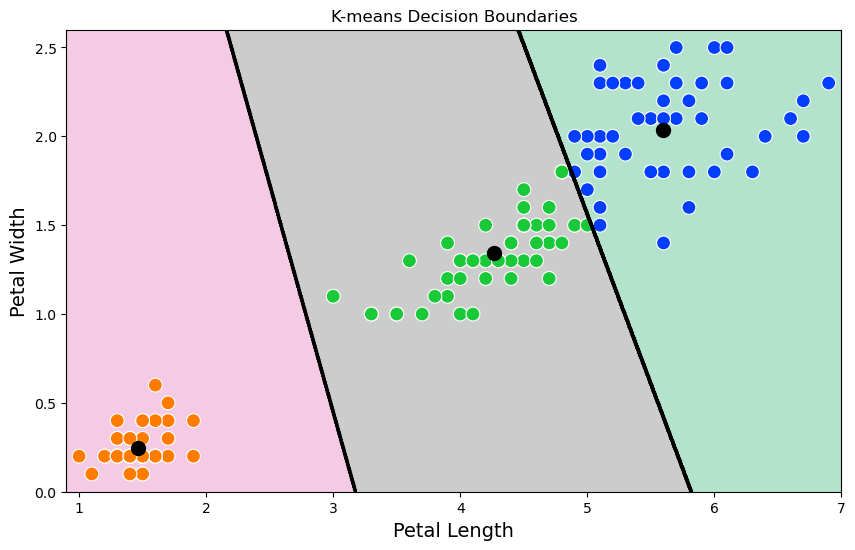

In [17]:
plot_boundaries(kmeans, pred_df)

### K-means Disadvantages

The wrong value of k can sometimes lead to the wrong conclusions

In this example, we will re-run k-means for the iris dataset using k=2 and k=4

In [18]:
# run k=2
kmeans_k2 = KMeans(n_clusters=2, random_state=42)
y_pred2 = kmeans_k2.fit_predict(X)

pred_df2 = pd.DataFrame(X, columns=features)
pred_df2['Prediction'] = y_pred2

In [19]:
# run k=4
kmeans_k4 = KMeans(n_clusters=4, random_state=42)
y_pred4 = kmeans_k4.fit_predict(X)

pred_df4 = pd.DataFrame(X, columns=features)
pred_df4['Prediction'] = y_pred4

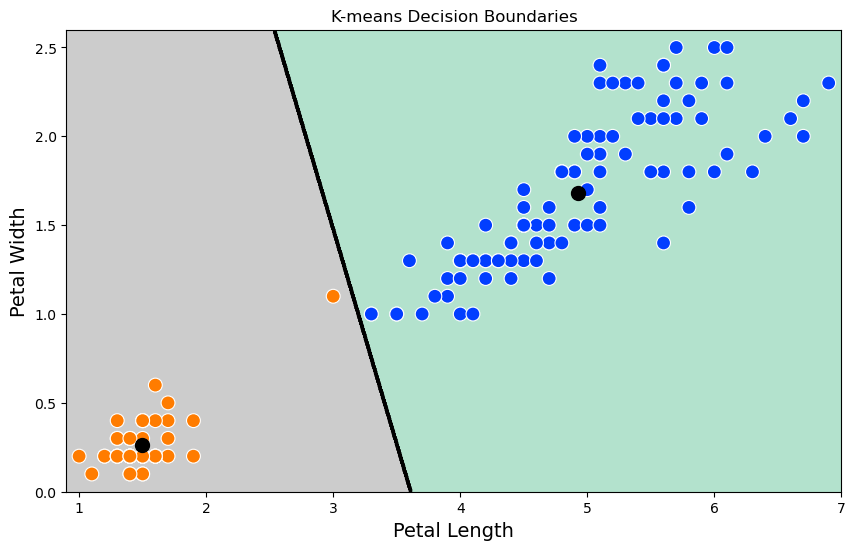

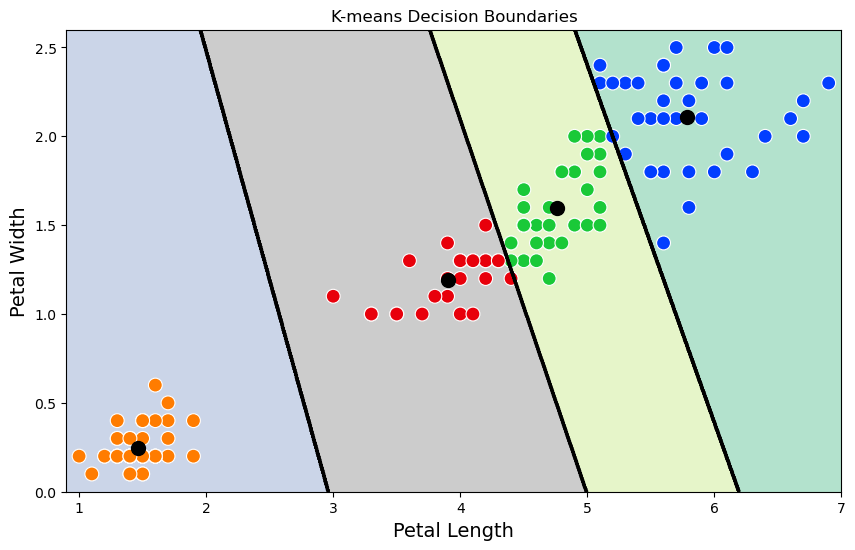

In [20]:
# compare results
plot_boundaries(kmeans_k2, pred_df2)
plot_boundaries(kmeans_k4, pred_df4)

# k=2 actually looks pretty good but we know from the data that there are 3 types of flowers.
# Always keep in mind that you never know with certainty if unsupervised learning is correct.  
# It only tells you how similar data is to other points in the dataset!

### Optimal K using Elbow Method

In [21]:
# run k-means for k from 1 to 10 (uses list comprehension, see https://www.w3schools.com/python/python_lists_comprehension.asp) 
kmeans_per_k = [KMeans(n_clusters=k).fit(X) for k in range(1, 10)]

# adds inertia to list using list comprehension
inertias = [model.inertia_ for model in kmeans_per_k]

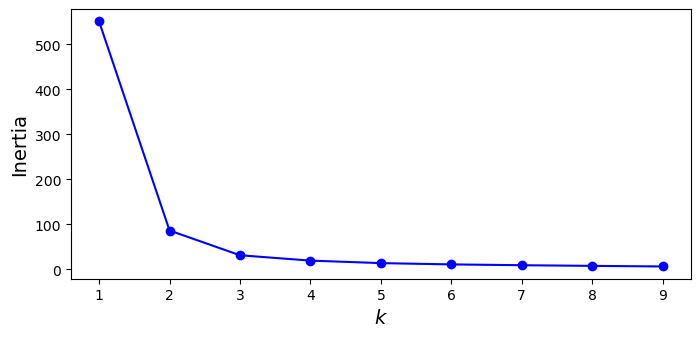

In [22]:
# plot results to see inertia for each k value from 1 to 10
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.show()

### Optimal K using Silhouette Method

In [23]:
from sklearn.metrics import silhouette_score

silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]

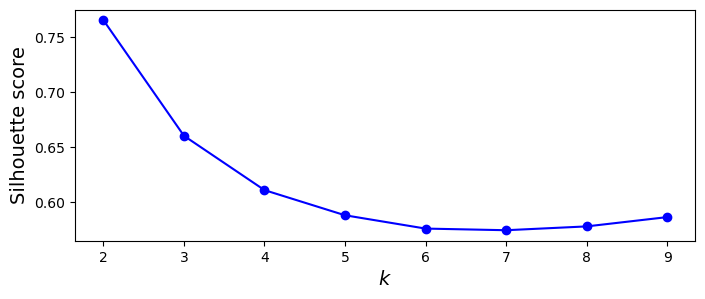

In [24]:
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
plt.show()

### Silhouette Diagram

The final metric to help select the best value of k is the Silhouette Diagram

This diagram shows the silhouette density for each cluster in each k value

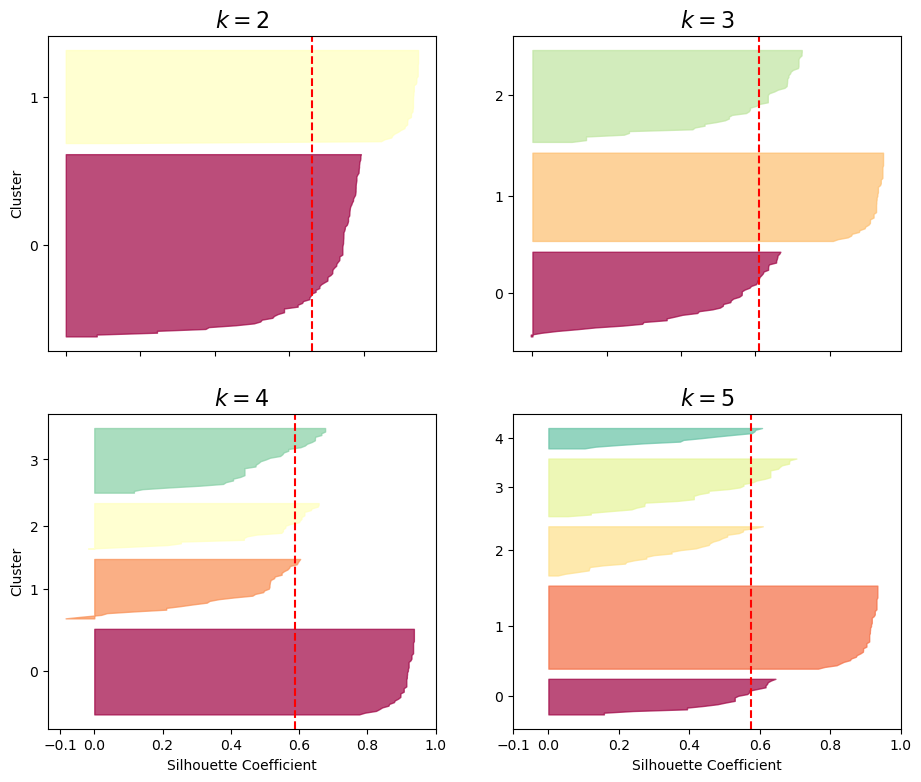

In [25]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter
import matplotlib as mpl

plt.figure(figsize=(11, 9))

for k in (2, 3, 4, 5):
    plt.subplot(2, 2, k - 1)
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(X, y_pred)

    padding = len(X) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (2, 4):
        plt.ylabel("Cluster")
    
    if k in (4, 5):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k - 1], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()